##پرسش یک - الف#

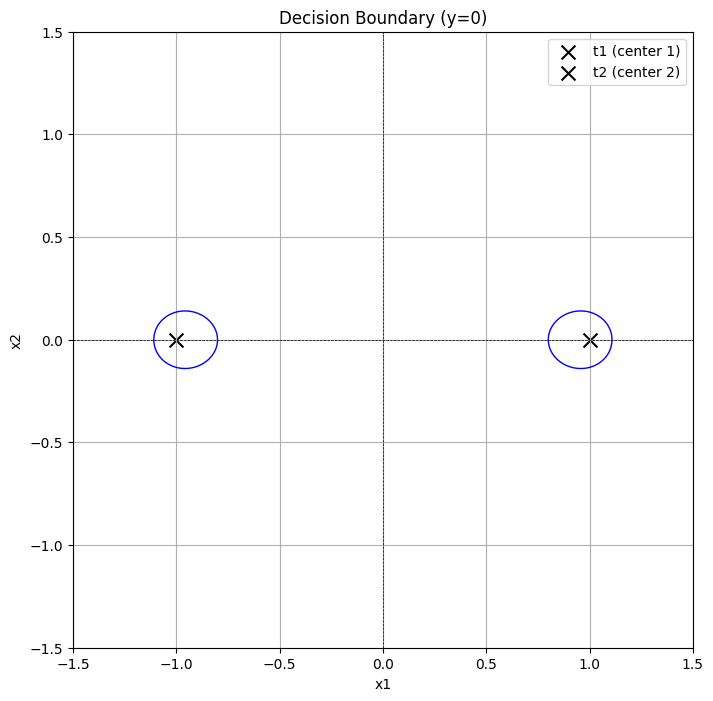

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the centers t1 and t2
t1 = np.array([1, 0])
t2 = np.array([-1, 0])

# Define a grid of points
x1 = np.linspace(-1.5, 1.5, 300)
x2 = np.linspace(-1.5, 1.5, 300)
X1, X2 = np.meshgrid(x1, x2)

# Compute the decision boundary function y
X = np.stack([X1, X2], axis=-1)
y = -np.exp(-np.linalg.norm(X - t1, axis=2)**2) - np.exp(-np.linalg.norm(X - t2, axis=2)**2) + 1

plt.figure(figsize=(8, 8))

# Mark the centers with an 'x'
plt.scatter(t1[0], t1[1], color='black', marker='x', s=100, label='t1 (center 1)')
plt.scatter(t2[0], t2[1], color='black', marker='x', s=100, label='t2 (center 2)')

# Plot the decision boundary
contour = plt.contour(X1, X2, y, levels=[0], colors='blue', linewidths=1)

plt.title('Decision Boundary (y=0)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

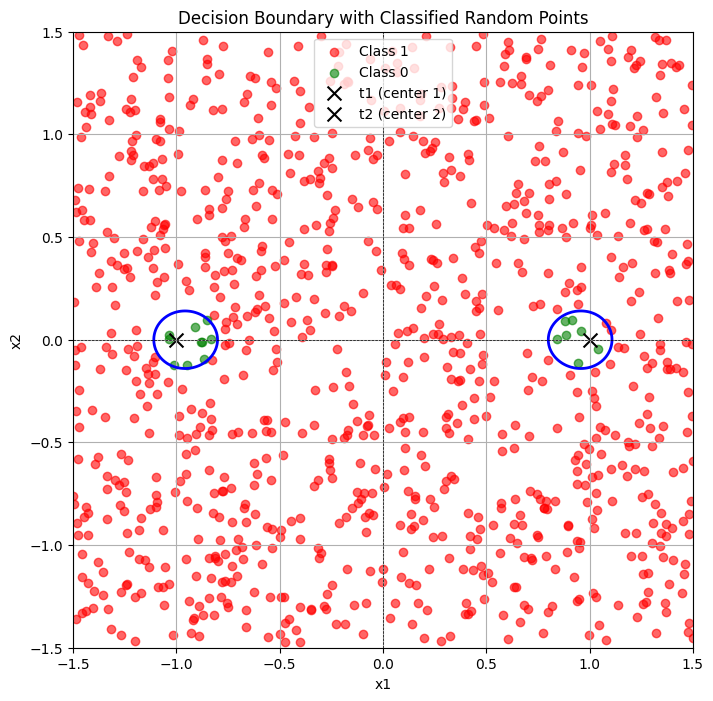

In [ ]:
# Generate random points in the space
np.random.seed(13)  # For reproducibility
num_random_points = 1000
random_points = np.random.uniform(low=-1.5, high=1.5, size=(num_random_points, 2))  # Random points in the space

# Compute y for each random point
y_values = -np.exp(-np.linalg.norm(random_points - t1, axis=1)**2) - np.exp(-np.linalg.norm(random_points - t2, axis=1)**2) + 1

# Assign classes: Class 1 if y > 0, Class 0 otherwise
classified_points_class_1 = random_points[y_values > 0]
classified_points_class_0 = random_points[y_values <= 0]

# Plot decision boundary and classified points
plt.figure(figsize=(8, 8))

# Plot classified points
plt.scatter(classified_points_class_1[:, 0], classified_points_class_1[:, 1], color='red', label='Class 1', alpha=0.6)
plt.scatter(classified_points_class_0[:, 0], classified_points_class_0[:, 1], color='green', label='Class 0', alpha=0.6)

# Plot the decision boundary with a single contour at y = 0
plt.contour(X1, X2, y, levels=[0], colors='blue', linewidths=2)

# Mark the centers with an 'x'
plt.scatter(t1[0], t1[1], color='black', marker='x', s=100, label='t1 (center 1)')
plt.scatter(t2[0], t2[1], color='black', marker='x', s=100, label='t2 (center 2)')

plt.title('Decision Boundary with Classified Random Points')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


##پرسش دو

In [57]:
import numpy as np

# Generate random data for x and y
np.random.seed(13)  # For reproducibility
num_data = 1000
x = np.random.uniform(-1, 1, num_data)  # Random data for x in range [-1, 1]
y = np.random.uniform(-1, 1, num_data)  # Random data for y in range [-1, 1]

# Define Gaussian membership function parameters
# Number of membership functions per input
n_mfs = 3

# Define centers for membership functions (evenly spaced in [-1, 1])
centers_x = np.linspace(-1, 1, n_mfs)
centers_y = np.linspace(-1, 1, n_mfs)

# Compute proposed variance for Gaussian membership functions
d_max_x = centers_x[-1] - centers_x[0]  # Max distance for x
d_max_y = centers_y[-1] - centers_y[0]  # Max distance for y

sigma_x = d_max_x / n_mfs  # Variance for x membership functions
sigma_y = d_max_y / n_mfs  # Variance for y membership functions

# Output results
print("Generated random data for x and y.")
print(f"x range: [{x.min()}, {x.max()}], y range: [{y.min()}, {y.max()}]")
print("\nMembership function parameters:")
print(f"Centers for x: {centers_x}")
print(f"Proposed variance for x: {sigma_x:.3f}")
print(f"Centers for y: {centers_y}")
print(f"Proposed variance for y: {sigma_y:.3f}")


Generated random data for x and y.
x range: [-0.9999759328610298, 0.9993685772905447], y range: [-0.9955648516722473, 0.9994165268974107]

Membership function parameters:
Centers for x: [-1.  0.  1.]
Proposed variance for x: 0.667
Centers for y: [-1.  0.  1.]
Proposed variance for y: 0.667


الف)

In [60]:
import numpy as npُُ
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

z = np.sin(np.pi * x) + np.cos(np.pi * y)

# Prepare the data for training
data = np.column_stack((x, y))
X_train, X_test, y_train, y_test = train_test_split(data, z, test_size=0.3, random_state=13)

# Define and train the MLP
mlp = MLPRegressor(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=500, random_state=13)
mlp.fit(X_train, y_train)

# Evaluate the MLP
y_pred_train = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

# Calculate the number of parameters in the MLP
input_neurons = X_train.shape[1]  # Number of input features
hidden_neurons = 10  # Number of neurons in the hidden layer
output_neurons = 1  # Number of output neurons
mlp_params = (input_neurons * hidden_neurons) + hidden_neurons + (hidden_neurons * output_neurons) + output_neurons

# Output results
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Number of Parameters in MLP: {mlp_params}")


Train MSE: 0.042259048261681566
Test MSE: 0.04473942517590944
Number of Parameters in MLP: 41


ب)

##پرسش سه

لود دیتا در محیط کولب

In [1]:
!pip install --upgrade --no-cache-dir gdown

import gdown
import pandas as pd

In [38]:
# link from google drive: https://drive.google.com/file/d/1HW_LtzES6R8Jdbn-dkNP7gMKFgtzhgb7/view?usp=drive_link

file_id = "1HW_LtzES6R8Jdbn-dkNP7gMKFgtzhgb7"
url = f"https://drive.google.com/uc?id={file_id}"

# File Direction
File_dir = "/content/evaporator.dat"
gdown.download(url, File_dir, quiet=False)

# move to dataframe
df = pd.read_csv(File_dir, sep='\t', header=None, engine='python')

# Convert data to numeric if necessary
df = df.apply(pd.to_numeric, errors='coerce')
df

Downloading...
From: https://drive.google.com/uc?id=1HW_LtzES6R8Jdbn-dkNP7gMKFgtzhgb7
To: /content/evaporator.dat
100%|██████████| 649k/649k [00:00<00:00, 15.9MB/s]


,0,1,2,3,4,5,6
0,1.011246,-0.935022,1.019753,-0.315268,0.182425,-0.062869,NaN
1,1.011246,-0.935022,-0.913381,-0.743985,0.827542,-0.062869,NaN
2,-0.991556,-0.962638,-1.030541,-0.101554,1.096341,0.261300,NaN
3,1.039063,0.984236,1.019753,-0.512577,0.881302,0.131632,NaN
4,0.997338,0.984236,1.027075,-0.281169,0.343704,-0.062869,NaN
...,...,...,...,...,...,...,...
6300,0.993524,-0.982784,1.032686,1.469205,-0.270319,-1.763189,NaN
6301,-0.968710,1.038635,1.025654,1.572471,-0.317648,-1.763189,NaN
6302,0.965492,-0.861499,-1.048885,1.529801,0.486946,-1.717518,NaN
6303,-1.024774,1.011683,-1.069982,1.156953,1.386198,-1.443495,NaN


الف)

حذف NAN

In [39]:
df_cleaned = df.drop(columns=[6])

df_cleaned


,0,1,2,3,4,5
0,1.011246,-0.935022,1.019753,-0.315268,0.182425,-0.062869
1,1.011246,-0.935022,-0.913381,-0.743985,0.827542,-0.062869
2,-0.991556,-0.962638,-1.030541,-0.101554,1.096341,0.261300
3,1.039063,0.984236,1.019753,-0.512577,0.881302,0.131632
4,0.997338,0.984236,1.027075,-0.281169,0.343704,-0.062869
...,...,...,...,...,...,...
6300,0.993524,-0.982784,1.032686,1.469205,-0.270319,-1.763189
6301,-0.968710,1.038635,1.025654,1.572471,-0.317648,-1.763189
6302,0.965492,-0.861499,-1.048885,1.529801,0.486946,-1.717518
6303,-1.024774,1.011683,-1.069982,1.156953,1.386198,-1.443495


نرمال سازی

In [40]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the data into train (70%) and test (30%) sets
train_data, test_data = train_test_split(df_normalized, test_size=0.3, random_state=13)
# Output the shapes of the resulting datasets
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

Train Data Shape: (4413, 6)
Test Data Shape: (1892, 6)


ب)

RBF

In [55]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define input (X) and output (y)
X_train = train_data.iloc[:, :-1].values  # All columns except the last
y_train = train_data.iloc[:, -1].values  # The last column
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

# Determine RBF centers using KMeans
n_centers = 10  # Number of RBF centers
kmeans = KMeans(n_clusters=n_centers, random_state=13)
kmeans.fit(X_train)
centers = kmeans.cluster_centers_

# Define the RBF activation function
def rbf_activation(X, centers, sigma):
    # Compute the distance between each input and each center
    distances = np.linalg.norm(X[:, np.newaxis] - centers, axis=2)
    # Apply the Gaussian function
    return np.exp(-distances**2 / (2 * sigma**2))

# Compute RBF activations for train and test sets
sigma = np.max(np.linalg.norm(centers[:, np.newaxis] - centers, axis=2)) / np.sqrt(n_centers)
phi_train = rbf_activation(X_train, centers, sigma)
phi_test = rbf_activation(X_test, centers, sigma)

# Train the output weights using linear regression
regressor = LinearRegression()
regressor.fit(phi_train, y_train)

# Predict and evaluate the model
y_pred_train = regressor.predict(phi_train)
y_pred_test = regressor.predict(phi_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

# Output results
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")


Train MSE: 0.0212
Test MSE: 0.0211


ANFIS

In [54]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define Gaussian Membership Function
def gaussian_mf(x, c, sigma):
    return np.exp(-((x - c) ** 2) / (2 * sigma ** 2))

# Initialize Membership Functions
def initialize_mfs(n_inputs, n_mfs):
    centers = []
    sigmas = []
    for _ in range(n_inputs):
        centers.append(np.linspace(0, 1, n_mfs))
        sigmas.append(np.full(n_mfs, (1 / (n_mfs - 1))))
    return np.array(centers), np.array(sigmas)

# Forward Pass
def forward_pass(X, centers, sigmas, linear_coeffs):
    n_samples = X.shape[0]
    n_inputs = X.shape[1]
    n_mfs = centers.shape[1]
    n_rules = n_mfs ** n_inputs  # Total number of rules
    rules_outputs = np.zeros((n_samples, n_rules))  # Correct shape for all rules

    # Generate rule activations
    for i, x in enumerate(X):
        rule_idx = 0
        for mf_combination in np.array(np.meshgrid(*centers)).T.reshape(-1, len(centers)):
            activation = np.prod([
                gaussian_mf(x[j], mf_combination[j], sigmas[j][np.where(centers[j] == mf_combination[j])[0][0]])
                for j in range(len(x))
            ])
            rules_outputs[i, rule_idx] = activation
            rule_idx += 1
    weighted_outputs = rules_outputs @ linear_coeffs
    return weighted_outputs, rules_outputs


# Backward Pass
def backward_pass(X, y, centers, sigmas, rules_outputs, linear_coeffs, lr=0.01):
    n_samples = X.shape[0]
    n_rules = rules_outputs.shape[1]
    for i in range(n_samples):
        error = y[i] - (rules_outputs[i] @ linear_coeffs)
        for r in range(n_rules):
            linear_coeffs[r] += lr * error * rules_outputs[i, r]
    return linear_coeffs

# Training ANFIS
def train_anfis(X_train, y_train, n_mfs, epochs=10, lr=0.01):
    n_inputs = X_train.shape[1]
    centers, sigmas = initialize_mfs(n_inputs, n_mfs)
    n_rules = np.prod([n_mfs] * n_inputs)
    linear_coeffs = np.random.rand(n_rules)
    for epoch in range(epochs):
        _, rules_outputs = forward_pass(X_train, centers, sigmas, linear_coeffs)
        linear_coeffs = backward_pass(X_train, y_train, centers, sigmas, rules_outputs, linear_coeffs, lr)
        y_pred, _ = forward_pass(X_train, centers, sigmas, linear_coeffs)
        mse = mean_squared_error(y_train, y_pred)
        print(f"Epoch {epoch + 1}/{epochs}, MSE: {mse:.4f}")
    return centers, sigmas, linear_coeffs

# Testing
def test_anfis(X_test, centers, sigmas, linear_coeffs):
    y_pred, _ = forward_pass(X_test, centers, sigmas, linear_coeffs)
    return y_pred

# Load Data and Train ANFIS
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

n_mfs = 3  # Number of MFs per input
epochs = 10  # Number of training epochs
lr = 0.01  # Learning rate

centers, sigmas, linear_coeffs = train_anfis(X_train, y_train, n_mfs, epochs, lr)

# Evaluate ANFIS
y_pred_test = test_anfis(X_test, centers, sigmas, linear_coeffs)
test_mse = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE: {test_mse:.4f}")


Epoch 1/10, MSE: 0.0317
Epoch 2/10, MSE: 0.0271
Epoch 3/10, MSE: 0.0252
Epoch 4/10, MSE: 0.0242
Epoch 5/10, MSE: 0.0235
Epoch 6/10, MSE: 0.0230
Epoch 7/10, MSE: 0.0227
Epoch 8/10, MSE: 0.0224
Epoch 9/10, MSE: 0.0222
Epoch 10/10, MSE: 0.0220
Test MSE: 0.0220
